# Importation des librairies

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# 1. Exploitation des données

In [68]:
df=pd.read_csv("data/titanic-passengers.csv", sep=";", encoding="iso-8859-1") #reading csv file

In [69]:
df.head() #view head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [70]:
df= df.set_index('PassengerId') #change index

In [71]:
#change the NaN
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [72]:
#cleaning column Survived 
cleanupS={"Survived":{"Yes":1, "No":0}}
df.replace(cleanupS,inplace=True)

In [73]:
#cleaning column Sex
cleanupSe={"Sex":{"male":1, "female":0}}
df.replace(cleanupSe, inplace=True)

In [74]:
df.head() #view head

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B96 B98,S
76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B96 B98,S
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B96 B98,S
672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [75]:
df.info() #view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 343 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


# Application de l'arbre de décision

In [76]:
X=df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1) #train set
y=df["Survived"] #test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10) #splitting data
tptree=tree.DecisionTreeClassifier() #instance decision tree
tptree.fit(X_train, y_train) #training our set
y_pred=tptree.predict(X_test) #predicting in test set
print("Score:{}".format(accuracy_score(y_test, y_pred))) #view score

Score:0.7821229050279329


# 2. Graph de l'arbre de décision

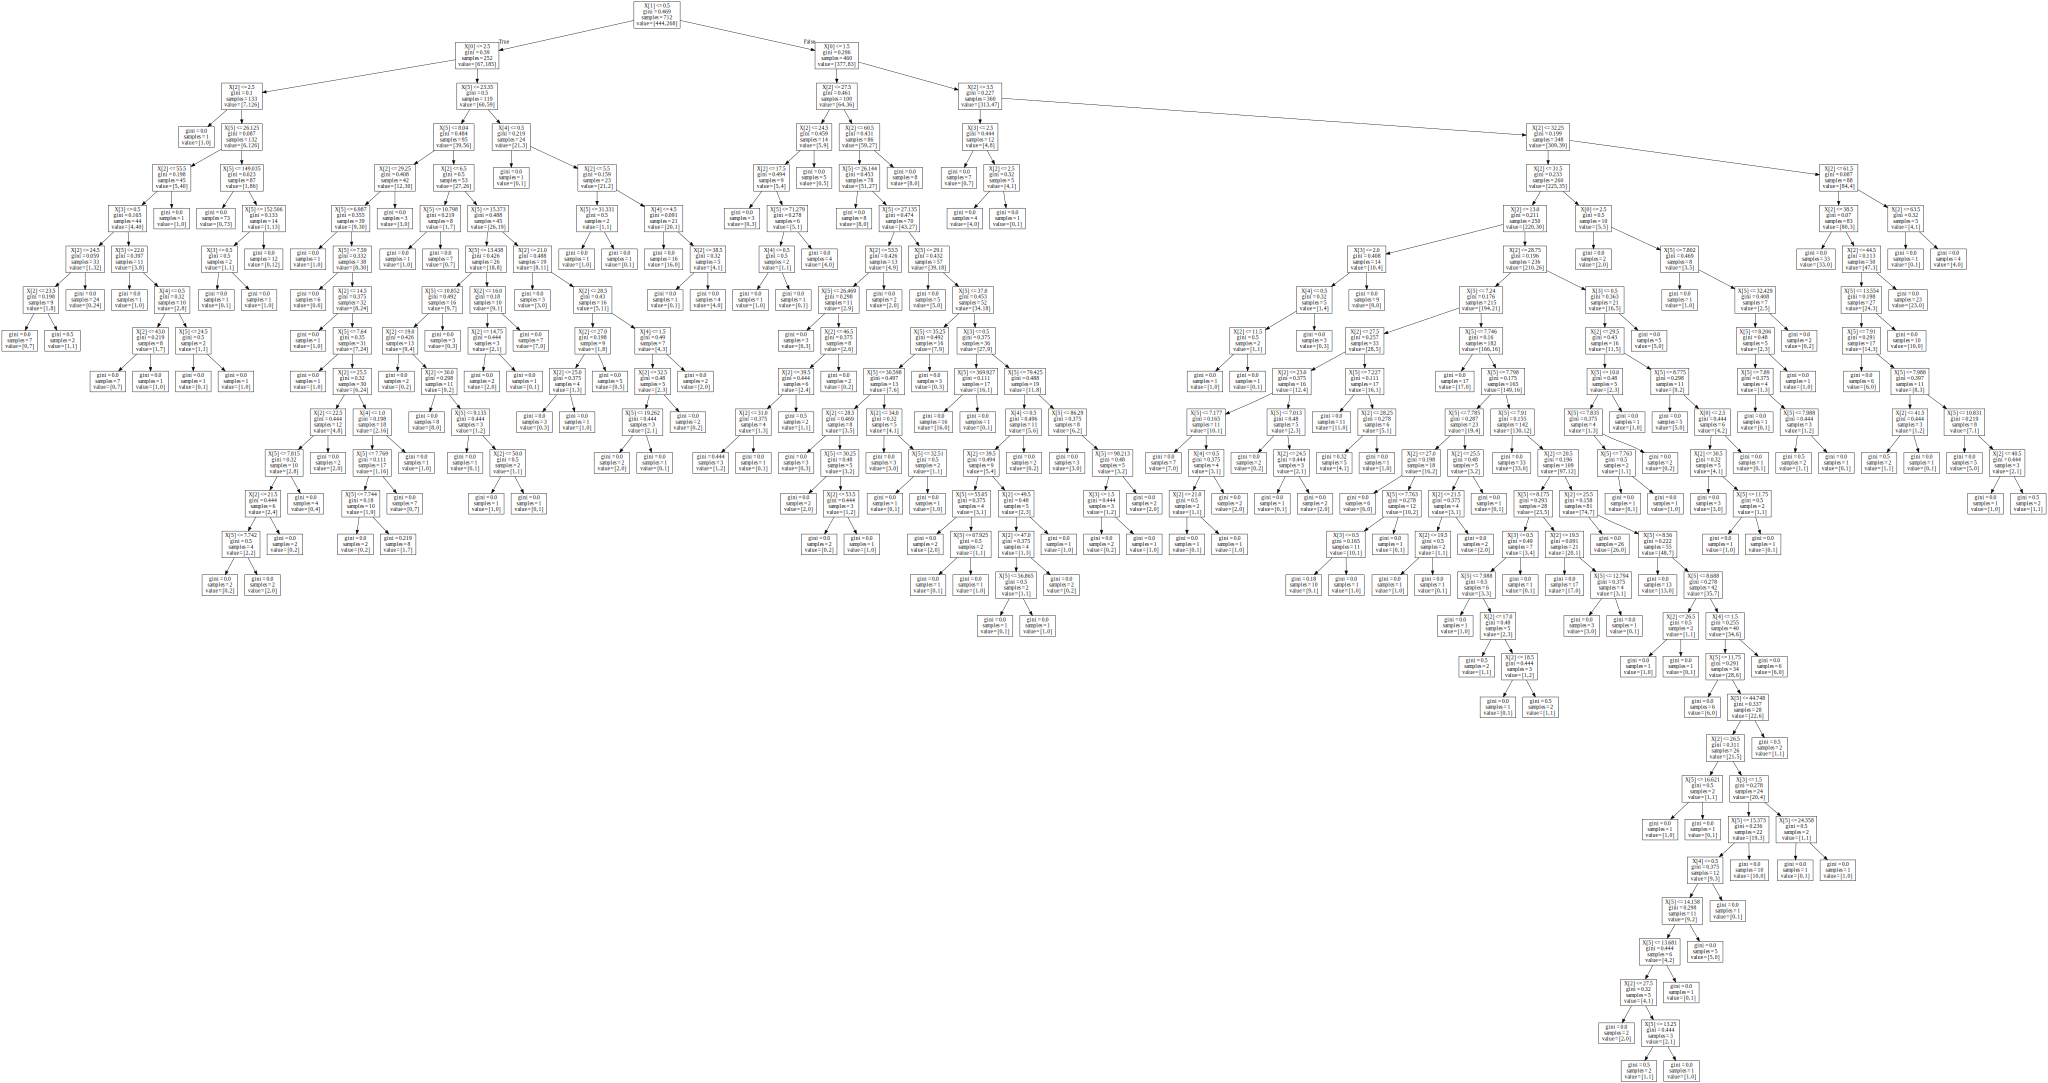

In [80]:
dot_df=tree.export_graphviz(tptree, out_file=None)
graph=graphviz.Source(dot_df)
graph.render("df")
graph

# 3. Modification des paramètres de l'arbre de décision

In [82]:
X=df.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked", "SibSp", "Parch"], axis=1) #train set
y=df["Survived"] #test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10) #splitting data
ntptree=tree.DecisionTreeClassifier() #instance decision tree
ntptree.fit(X_train, y_train) #training our set


Score:0.7932960893854749


# Nouvel arbre de décision

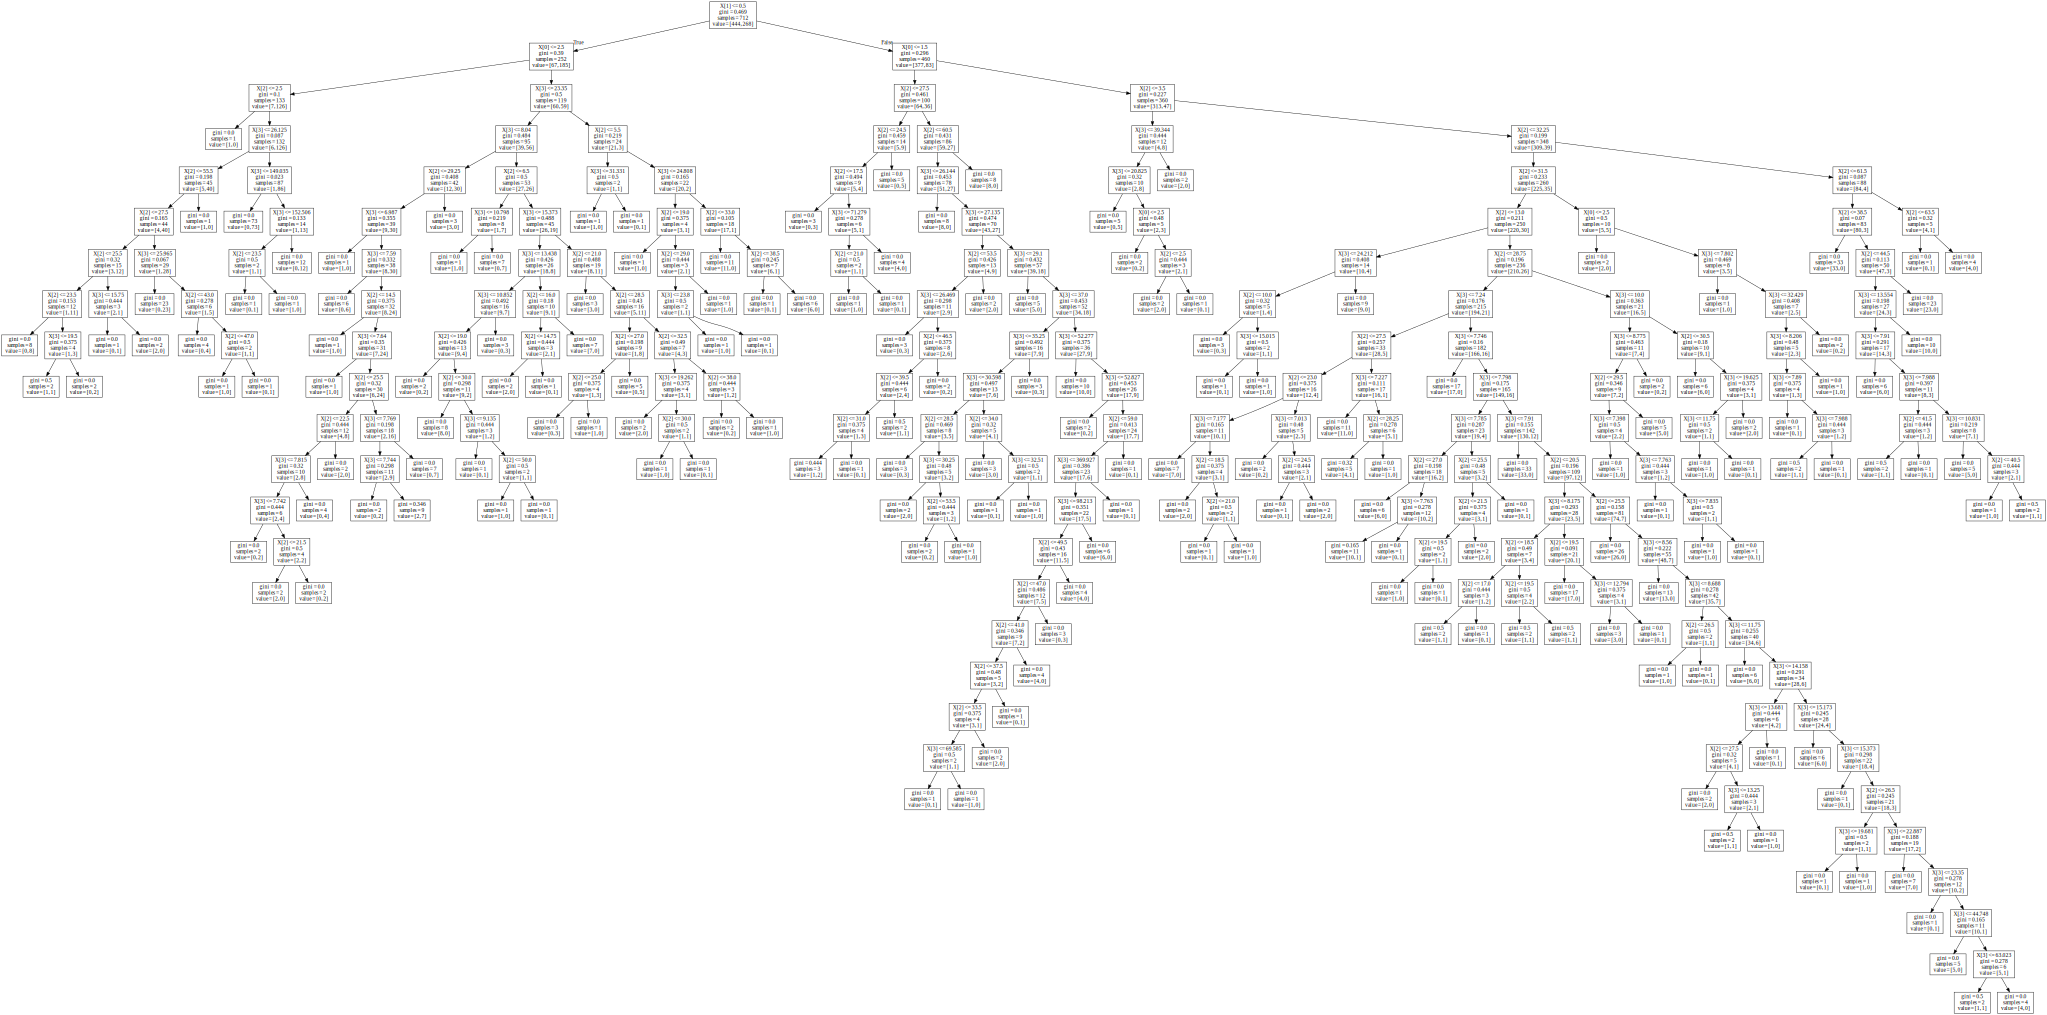

In [83]:
dot_df=tree.export_graphviz(ntptree, out_file=None)
graph=graphviz.Source(dot_df)
graph.render("df")
graph

# 4. Nouvelle précision

In [ ]:
y_pred=ntptree.predict(X_test) #predicting in test set
print("Score:{}".format(accuracy_score(y_test, y_pred))) #view score

# 5. Random forest

In [87]:
clf=RandomForestClassifier(n_estimators=10) #instance random forest
clf.fit(X_train, y_train) #training our set


Score:0.8324022346368715


# 6. Nouvelle précision

In [ ]:
y_pred=clf.predict(X_test) #predicting in test set
print("Score:{}".format(metrics.accuracy_score(y_test, y_pred))) #view score